In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import joblib

In [2]:
model = joblib.load('fraud_activity_model.pkl')

In [3]:
test_data = pd.read_csv('test_fraud_transactions.csv')

In [4]:
X_test = test_data.drop('isFraud', axis=1)
y_test = test_data['isFraud']

In [5]:
scaler = StandardScaler() 
X_test_scaled = scaler.fit_transform(X_test)

In [6]:
# Model evaluation
y_pred = model.predict(X_test_scaled)
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]

In [7]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[153856      1]
 [  2385      0]]


In [8]:
# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    153857
           1       0.00      0.00      0.00      2385

    accuracy                           0.98    156242
   macro avg       0.49      0.50      0.50    156242
weighted avg       0.97      0.98      0.98    156242



In [9]:
# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

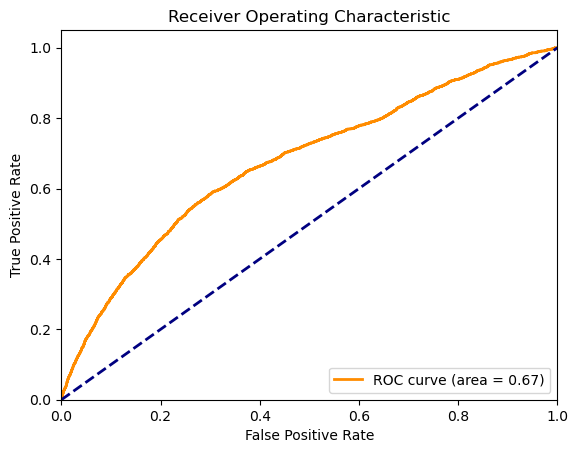

AUC: 0.6746049835352435


In [10]:
# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print("AUC:", roc_auc)